In [22]:
#import libs
import os, glob
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
import warnings
warnings.simplefilter("ignore")

In [2]:
DATA_PATH = '../data/processed/Alarms_data_processed.parquet'

In [3]:
df = pd.read_parquet(DATA_PATH)
df.head(1)

,Severity,Name,Alarm Source,Occurred On (NT),Cleared On (NT),Type,Alarm Duration,Alarm_Duration_Hour
40,Major,IKE Negotiation Failure,LSINS38284,2021-10-13 14:38:00,2021-10-14 10:38:00,Trunk system,19 hours 59 minutes 40 seconds,20.0


In [7]:
print("Total Number of Alarms : {}".format(df.shape[0]))

Total Number of Alarms : 6400938


In [8]:
print('Number of unique Alarms: {}'.format(len(df['Name'].unique())))

Number of unique Alarms: 163


In [9]:
print('Number of Alarm Source : {}'.format(len(df['Alarm Source'].unique())))

Number of Alarm Source : 1465


Text(0.5, 1.0, 'Severity Percentage')

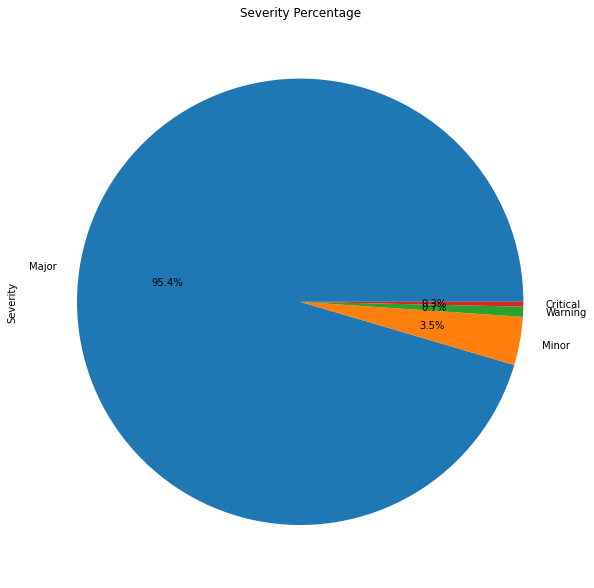

In [10]:
df['Severity'].value_counts().plot(kind='pie',figsize=[10,15],autopct='%1.1f%%')
plt.title('Severity Percentage')

Text(0.5, 1.0, 'Count of Types')

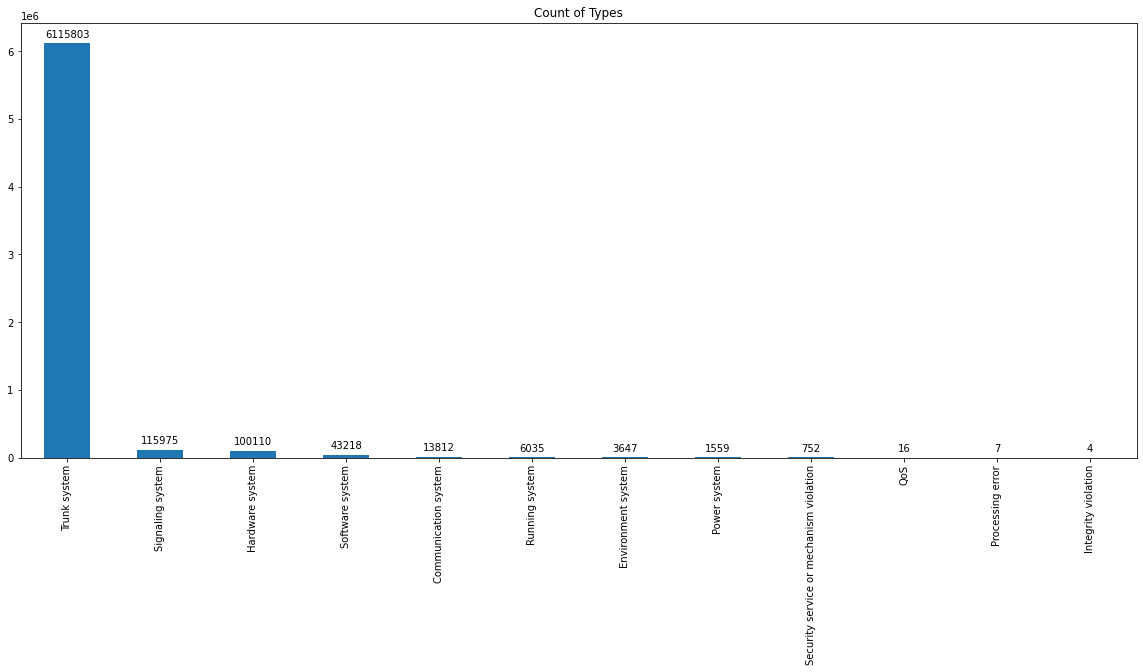

In [11]:
ax = df['Type'].value_counts().plot(kind='bar',figsize=[20,8])
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Count of Types')

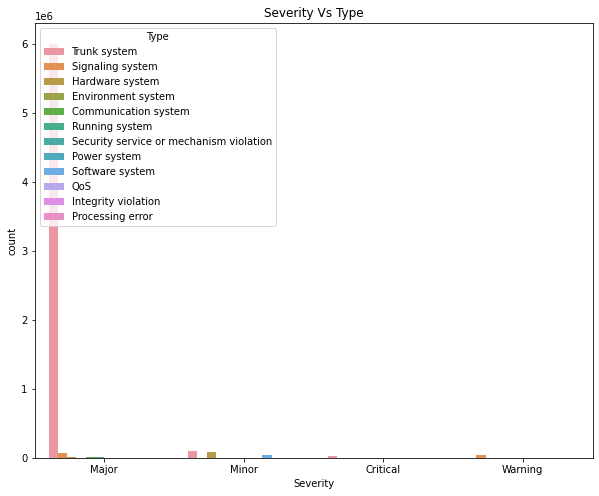

In [12]:
fig, axs = plt.subplots(figsize = (10,8))
fig = sns.countplot(x="Severity", hue ='Type', data = df)
plt.title('Severity Vs Type')
plt.show()

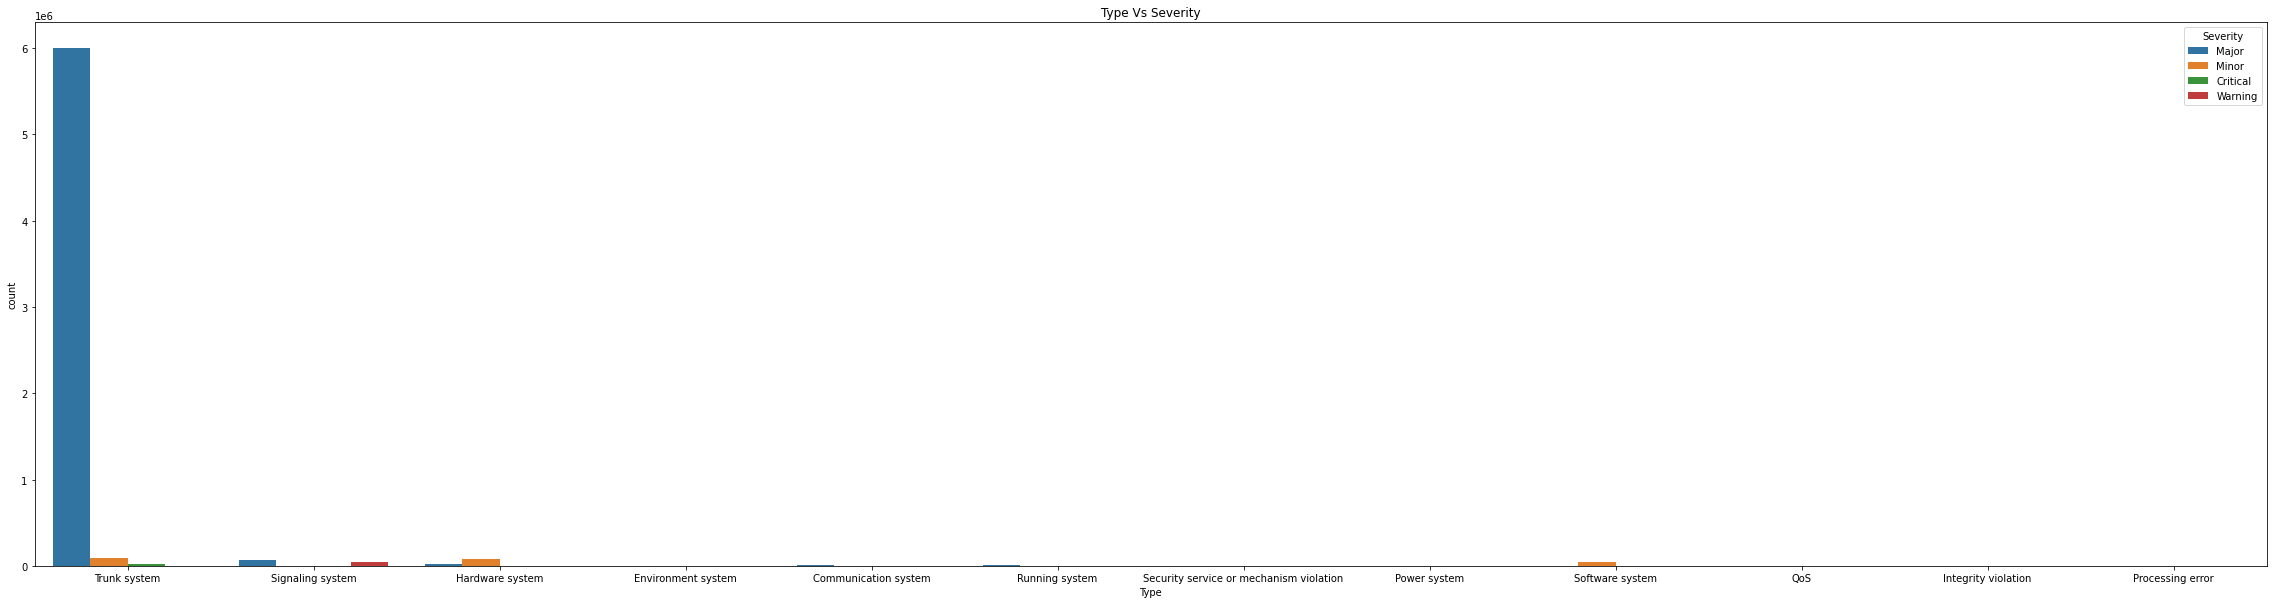

In [13]:
fig, axs = plt.subplots(figsize = (40,10))
sns.countplot(x="Type", hue ='Severity', data = df)
plt.title('Type Vs Severity')
plt.show()

<AxesSubplot:>

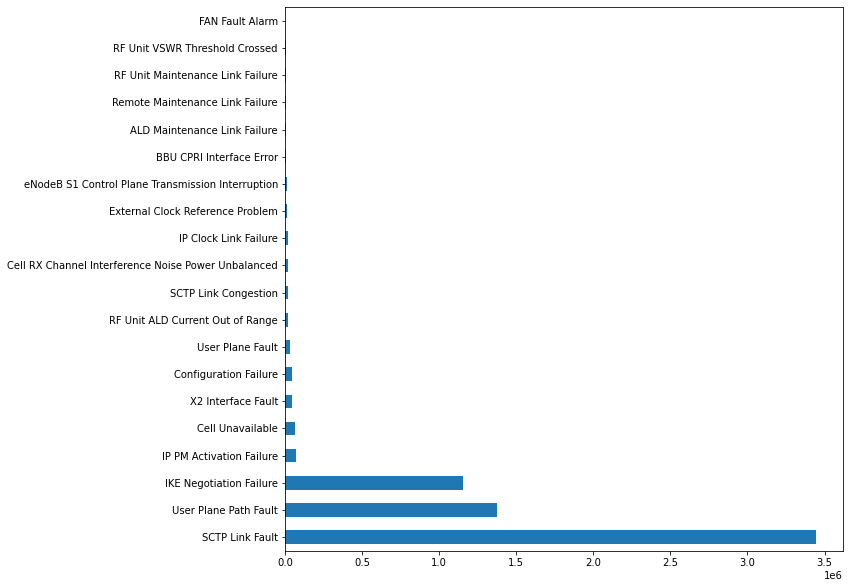

In [14]:
df['Name'].value_counts().head(20).plot(kind='barh',figsize=[10,10])

Text(0.5, 1.0, 'Top 20 Sites')

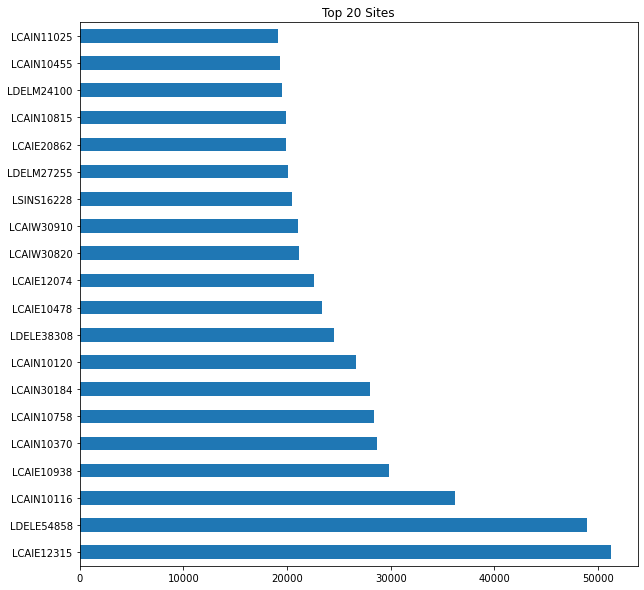

In [15]:
df['Alarm Source'].value_counts().head(20).plot(kind='barh',figsize=[10,10])
plt.title('Top 20 Sites')

In [16]:
print('Alarms Occurred in months : {}'.format(pd.to_datetime(df['Occurred On (NT)']).dt.month.unique()))

Alarms Occurred in months : [10 11 12]


In [17]:
df['Alarm&Source']=df['Name'] + '_' + df['Alarm Source']
len(df['Alarm&Source'].unique())

20885

Text(0.5, 1.0, 'Top 20 Sites')

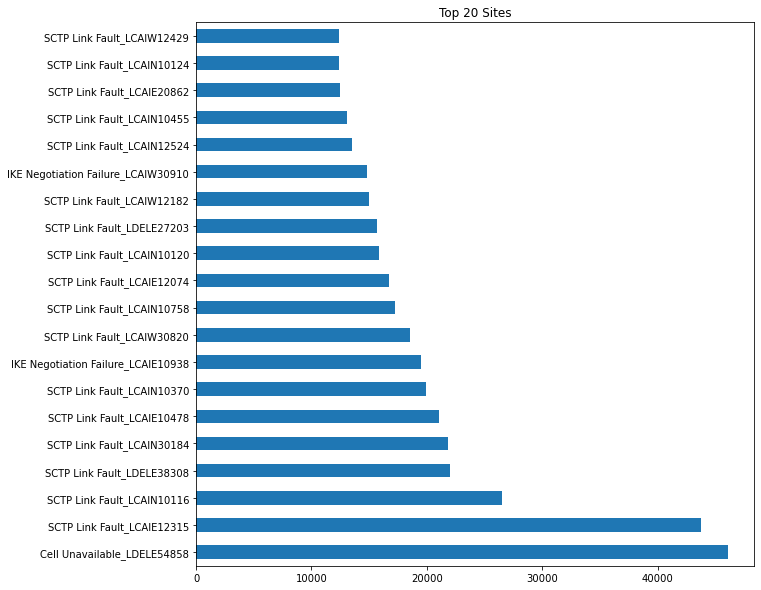

In [18]:
df['Alarm&Source'].value_counts().head(20).plot(kind='barh',figsize=[10,10])
plt.title('Top 20 Sites')

In [20]:
print('Average Duration of Alarm : {}'.format(df['Alarm_Duration_Hour'].mean()))

Average Duration of Alarm : 4.384720745824167


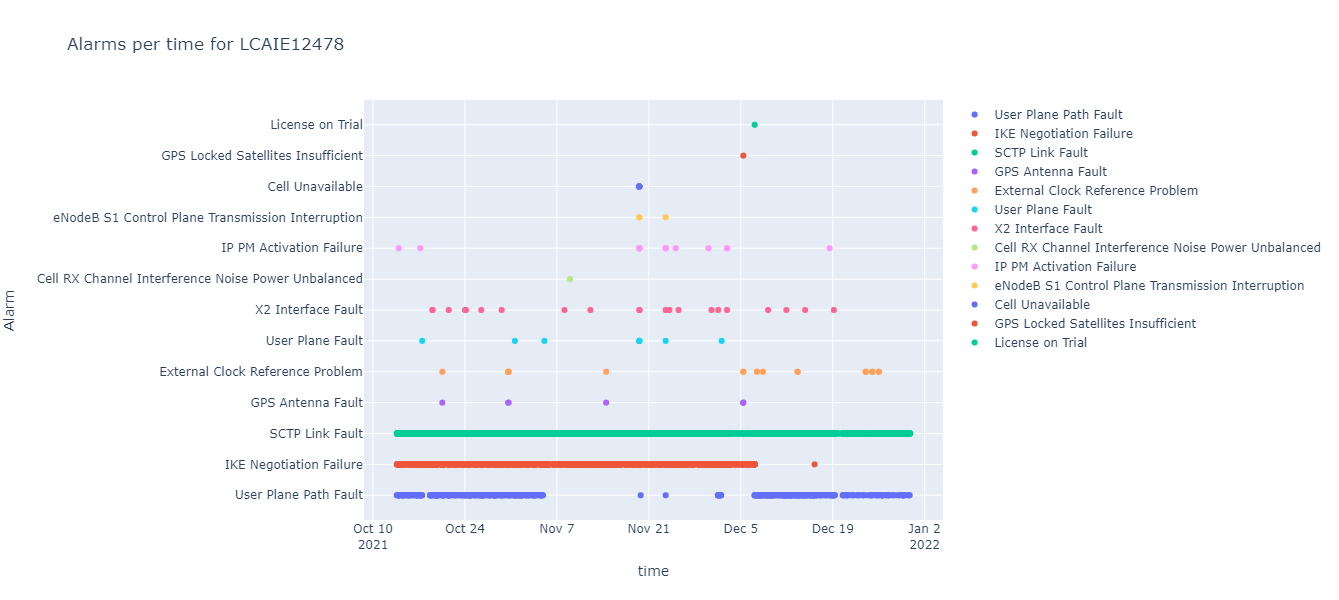

In [24]:
#Site alarms
data=[]
snap = df[df['Alarm Source']=='LCAIE12478']
for i in snap['Name'].unique():
    snap2 = snap[snap['Name']==i]
    trace = go.Scatter(x=pd.to_datetime(snap2['Occurred On (NT)']),y=snap2['Name'],name=i,mode='markers')
    data.append(trace)
layout = go.Layout(title='Alarms per time for LCAIE12478', xaxis ={'title':'time'},yaxis={'title':'Alarm'}, hovermode = 'x unified',height=600)
fig = go.Figure(data=data, layout=layout)
fig.show()